In [2]:
import matplotlib.pyplot as plt 
from misc import *
import tensorflow as tf
from tqdm import tqdm
import os 
from RNN_models import *


%load_ext autoreload
%autoreload 2

In [3]:
from misc import load_data, get_def_path

periods = 10
ppp=1000
defpath = get_def_path()
path = defpath+"{}periods/{}ppp/".format(periods,ppp)


In [4]:
means, covs, signals, coeffs = load_data(path)
tfsignals = tf.convert_to_tensor(signals)[tf.newaxis]
A,dt,C,D = coeffs

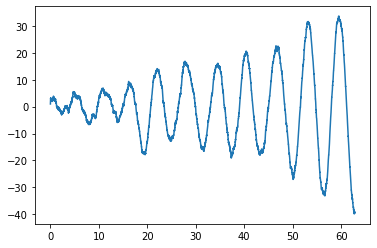

In [5]:
times = np.linspace(0,periods*2*np.pi, periods*ppp+1)
total_time = times[-1]
plt.plot(times, means[:,0])

In [6]:
rmodel = GRNNmodel([C,D,dt, total_time], cov_in=tf.convert_to_tensor(covs[0].astype(np.float32)), stateful=False)
rmodel.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01))
rmodel.recurrent_layer(tfsignals[:,:10,:], initial_state=rmodel.initial_state)
#rmodel.trainable_variables[0].assign(tf.convert_to_tensor(A.astype(np.float32)))



<tf.Tensor: shape=(1, 10, 2), dtype=float32, numpy=
array([[[ 0.01256637,  0.        ],
        [ 0.01382301, -0.00125664],
        [ 0.01256637, -0.00251327],
        [ 0.01382301, -0.00376991],
        [ 0.01507965, -0.00502655],
        [ 0.01633628, -0.00628319],
        [ 0.01759292, -0.00753982],
        [ 0.0173087 , -0.00879646],
        [ 0.01856534, -0.0100531 ],
        [ 0.0189236 , -0.01130973]]], dtype=float32)>

In [ ]:

history = rmodel.fit(x=tfsignals, y=tfsignals, 
                     epochs = 10**2, callbacks = [tf.keras.callbacks.EarlyStopping(monitor='total_loss', 
                                                                                   min_delta=0, patience=500,
                                                                                   verbose=0,
                                                                                   mode='min')])



Epoch 1/100
1/1 [==============================] - 0s 1ms/step - total_loss: 3.3104e-04 - Coeffs_A: -0.0101 - grads: 2.1450e-05
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - total_loss: 3.2994e-04 - Coeffs_A: -0.0148 - grads: 2.1220e-05
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - total_loss: 3.2882e-04 - Coeffs_A: -0.0196 - grads: 2.0941e-05
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - total_loss: 3.2769e-04 - Coeffs_A: -0.0244 - grads: 2.0835e-05
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - total_loss: 3.2656e-04 - Coeffs_A: -0.0293 - grads: 2.0599e-05
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - total_loss: 3.2544e-04 - Coeffs_A: -0.0341 - grads: 2.0259e-05
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - total_loss: 3.2432e-04 - Coeffs_A: -0.0389 - grads: 1.9907e-05
Epoch 8/100


In [30]:
rmodel.trainable_variables

[<tf.Variable 'rnn/stacked_rnn_cells/rcell/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.6771794 ,  0.917597  ],
        [-0.9310472 , -0.63289887]], dtype=float32)>]

In [31]:
histories = rmodel.history.history
#keys_histories = list(histories.keys())
#for k,v, in histories.items():
 #   np.save(train_path+"{}".format(k), v, allow_pickle=True)


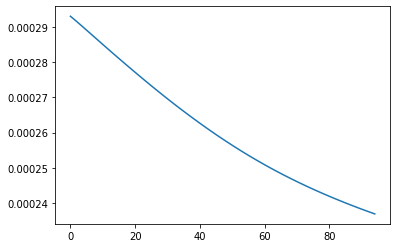

In [34]:
plt.plot(histories["total_loss"])